# Chapter 10: Deep Learning Models in Image Processing

# Classification of MNIST using CNN Keras


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Tải dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tiền xử lý dữ liệu
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))  # Định dạng lại dữ liệu thành (28, 28, 1)
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))    # Định dạng lại dữ liệu
x_train, x_test = x_train / 255.0, x_test / 255.0          # Chuẩn hóa dữ liệu



*   Dữ liệu MNIST bao gồm 70,000 ảnh (60,000 cho tập huấn luyện và 10,000 cho tập kiểm tra).
    
*   Các ảnh trong MNIST là ảnh grayscale (đơn sắc) kích thước 28×2828 \\times 2828×28, đại diện cho các chữ số từ 0 đến 9.
    
*   x\_train, x\_test: mảng chứa dữ liệu ảnh.
    
*   y\_train, y\_test: mảng chứa nhãn tương ứng (0 đến 9).

Chuyển đổi dữ liệu ảnh từ định dạng 2D 
(
28
,
28
)
(28,28) sang 3D 
(
28
,
28
,
1
)
(28,28,1) để phù hợp với đầu vào của các mô hình CNN.
(
28
,
28
)
(28,28): Kích thước của từng ảnh.
1: Kênh màu của ảnh (ảnh grayscale có 1 kênh màu, ảnh RGB có 3 kênh màu).

In [ ]:
# Xây dựng mô hình CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output với 10 lớp cho các con số 0-9
])

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình và lưu lại lịch sử huấn luyện
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Vẽ biểu đồ accuracy và loss



*   **Conv2D(32, (3, 3))**: Đây là lớp tích chập (convolutional layer) với 32 bộ lọc (filters) kích thước 3x3. Mỗi bộ lọc sẽ trượt qua ảnh và học các đặc trưng (features) từ ảnh đầu vào.
    
*   **activation='relu'**: Hàm kích hoạt ReLU (Rectified Linear Unit) giúp mô hình học các đặc trưng phi tuyến. ReLU hoạt động bằng cách chuyển tất cả các giá trị âm về 0 và giữ nguyên giá trị dương.
    
*   **input\_shape=(28, 28, 1)**: Đây là hình dạng (shape) của dữ liệu đầu vào. Vì bộ dữ liệu MNIST gồm các ảnh có kích thước 28x28 pixel và là ảnh đen trắng (grayscale), nên mỗi ảnh có chiều cao và chiều rộng là 28, và chỉ có một kênh màu (1).

*   **MaxPooling2D((2, 2))**
    
*   Đây là lớp pooling (lấy mẫu) với kích thước 2x2
    
*   Lớp này giúp giảm độ phân giải của ảnh đầu ra từ lớp Conv2D, đồng thời giữ lại các đặc trưng quan trọng nhất. Cụ thể, nó sẽ lấy giá trị lớn nhất trong mỗi khối 2x2 của ảnh đầu vào, giúp giảm thiểu sự phức tạp và tăng tính chính xác của mô hình.

*   **Flatten()**
    
*   : Lớp này có nhiệm vụ "phẳng hóa" các đặc trưng đầu vào thành một vector một chiều. Sau khi qua các lớp Conv2D và MaxPooling2D, đầu ra sẽ có dạng ma trận 2 chiều, lớp Flatten sẽ chuyển đổi ma trận này thành một vector để đưa vào các lớp Fully Connected (lớp Dense).

*   **optimizer='adam'**: Chọn thuật toán tối ưu hóa Adam, một thuật toán phổ biến giúp tối ưu hóa hàm mất mát (loss function) trong việc huấn luyện mạng nơ-ron. Adam sử dụng các thông tin về độ dốc và trung bình động để điều chỉnh tốc độ học (learning rate).
    
*   **loss='sparse\_categorical\_crossentropy'**: Hàm mất mát (loss function) được sử dụng là **sparse categorical crossentropy**. Đây là một lựa chọn thích hợp khi có nhiều lớp phân loại (như 10 lớp cho các con số từ 0 đến 9) và nhãn đầu ra là các số nguyên.
    
*   **metrics=\['accuracy'\]**: Mô hình sẽ theo dõi độ chính xác (accuracy) trong quá trình huấn luyện và đánh giá.

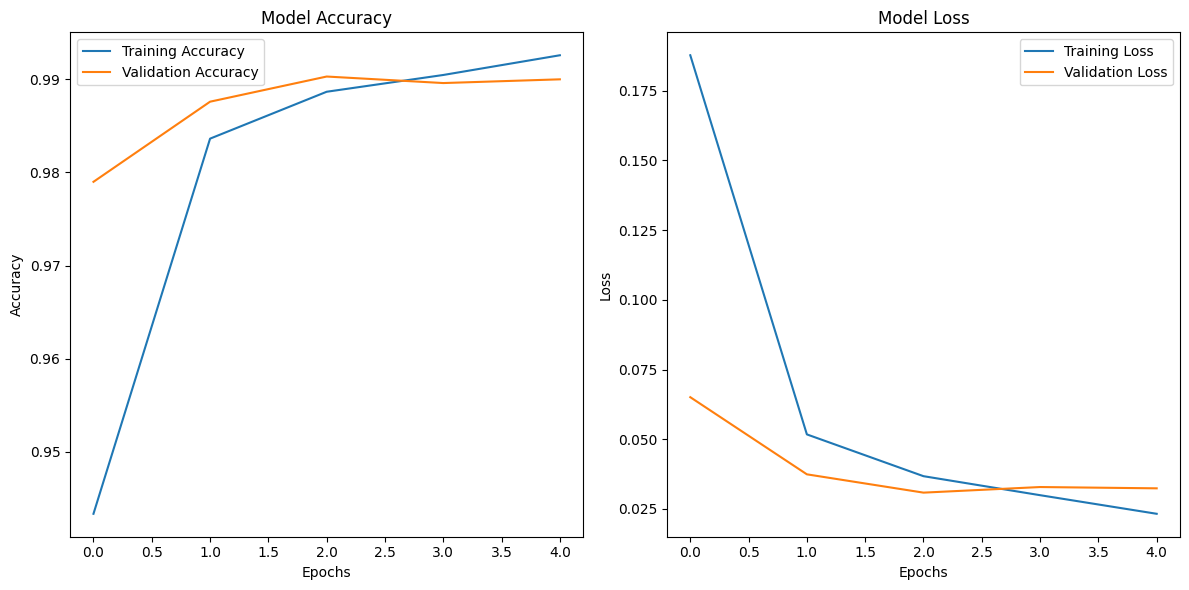

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


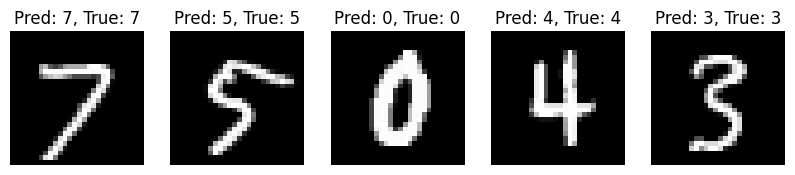

In [5]:

# Accuracy trên tập huấn luyện và tập kiểm tra
plt.figure(figsize=(12, 6))

# Accuracy của mô hình trong quá trình huấn luyện
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Loss của mô hình trong quá trình huấn luyện
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

# Dự đoán ngẫu nhiên 5 ảnh từ tập test
random_indices = np.random.choice(x_test.shape[0], 5, replace=False)  # Lấy 5 chỉ số ngẫu nhiên
random_images = x_test[random_indices]
random_labels = y_test[random_indices]
predictions = model.predict(random_images)

# Hiển thị các ảnh và dự đoán
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(random_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}, True: {random_labels[i]}")
    plt.axis('off')
plt.show()

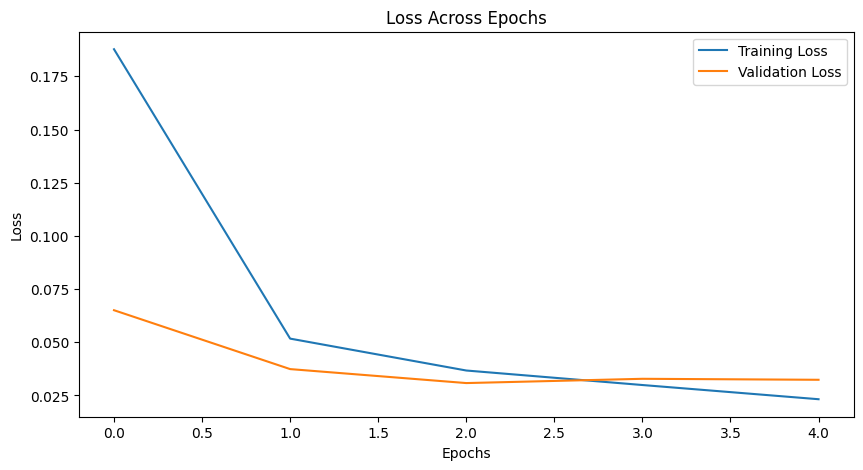

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


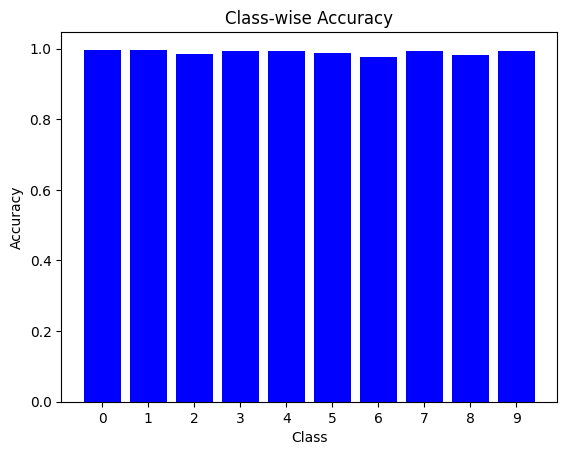

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


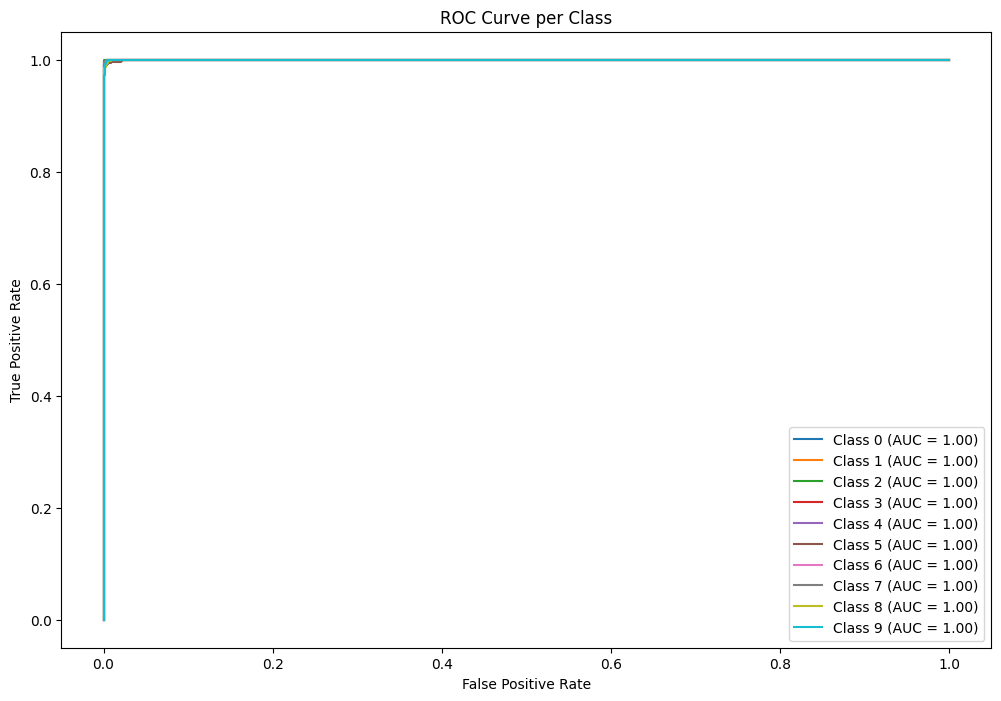

In [4]:
# Biểu đồ Learning Rate
from sklearn.metrics import roc_curve, auc, confusion_matrix
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Class-wise Accuracy
y_pred_classes = np.argmax(model.predict(x_test), axis=1)
class_correct = [0] * 10
class_total = [0] * 10

for i in range(len(y_test)):
    label = y_test[i]
    pred = y_pred_classes[i]
    if label == pred:
        class_correct[label] += 1
    class_total[label] += 1

class_accuracy = [class_correct[i] / class_total[i] for i in range(10)]

plt.bar(range(10), class_accuracy, color='blue')
plt.title('Class-wise Accuracy')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.xticks(range(10))
plt.show()

# ROC Curve per Class
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_pred_prob = model.predict(x_test)

plt.figure(figsize=(12, 8))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.title('ROC Curve per Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()